Reading, Analyzing, Scaling and Wrangling the data

In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [130]:
data = pd.read_csv('Salary_Data.csv')

In [131]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [132]:
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [133]:
print(data.shape)

(30, 2)


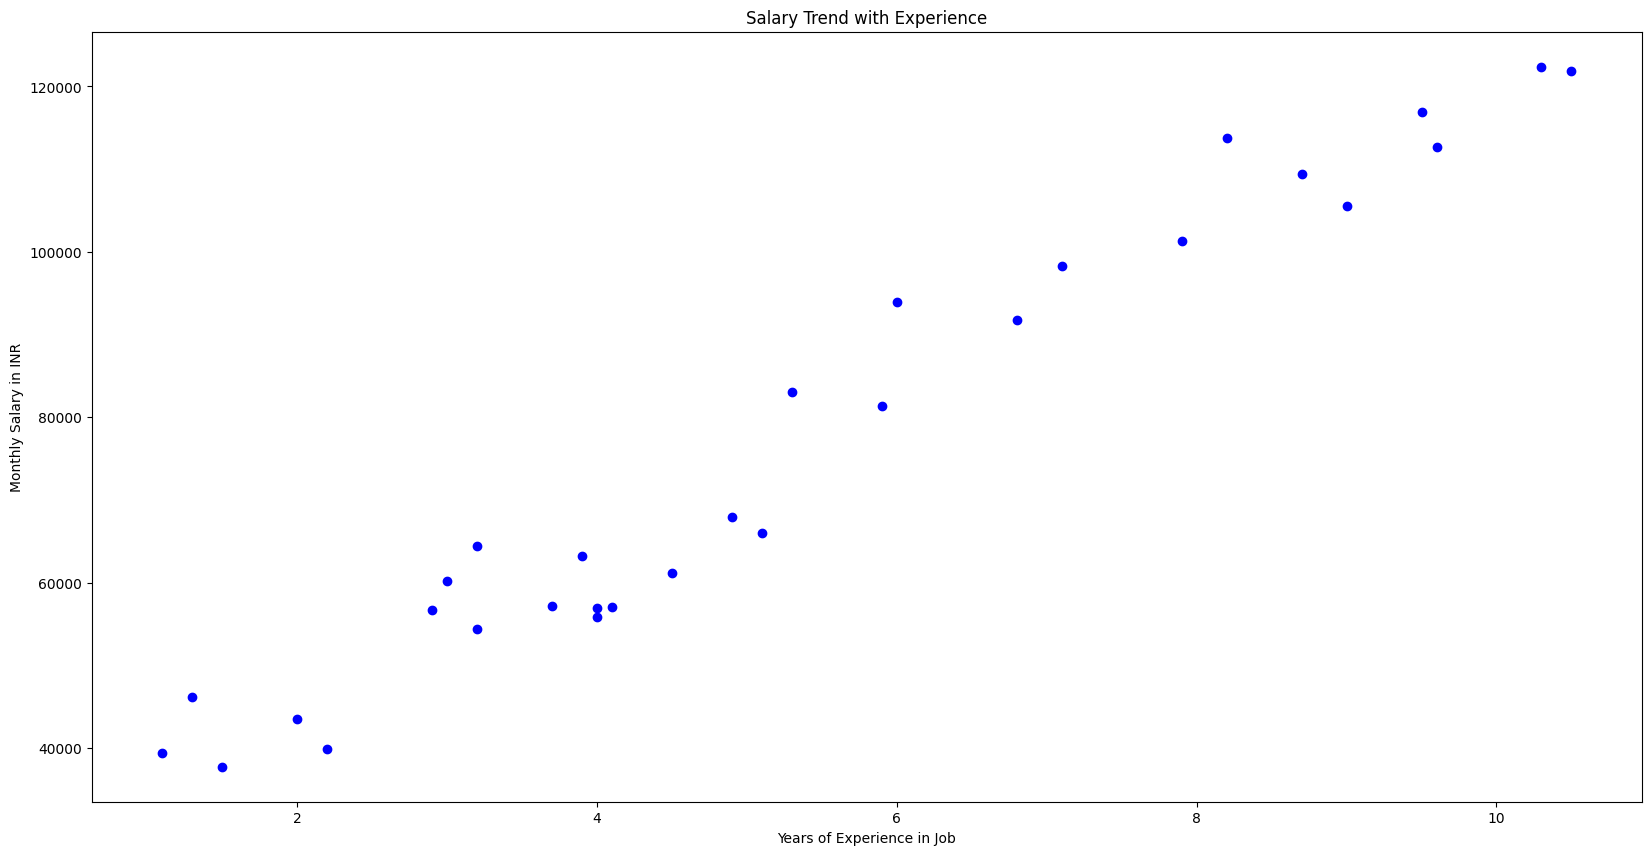

In [134]:
# We can observe general trend of our data
plt.scatter(data["YearsExperience"], data["Salary"], c = 'b')
plt.title('Salary Trend with Experience')
plt.xlabel('Years of Experience in Job')
plt.ylabel('Monthly Salary in INR')
plt.show()

Mathematical implementation of Linear Regression

In [141]:
X = data["YearsExperience"].values
Y = data["Salary"].values

In [142]:
mean_X = np.mean(X)
mean_Y = np.mean(Y)

In [143]:
print(mean_X, mean_Y)
print(np.max(X), np.min(X), np.max(Y), np.min(Y))

5.3133333333333335 76003.0
10.5 1.1 122391.0 37731.0


In [144]:
# Y =mX+c
numerator = 0
denominator = 0
for i in range(len(X)):
    numerator+= (X[i]-mean_X)*(Y[i]-mean_Y)
    denominator+= (X[i]-mean_X)**2
slope = numerator/denominator
intercept = mean_Y - (m*mean_X)
print(slope, intercept)

9449.962321455077 25792.20019866869


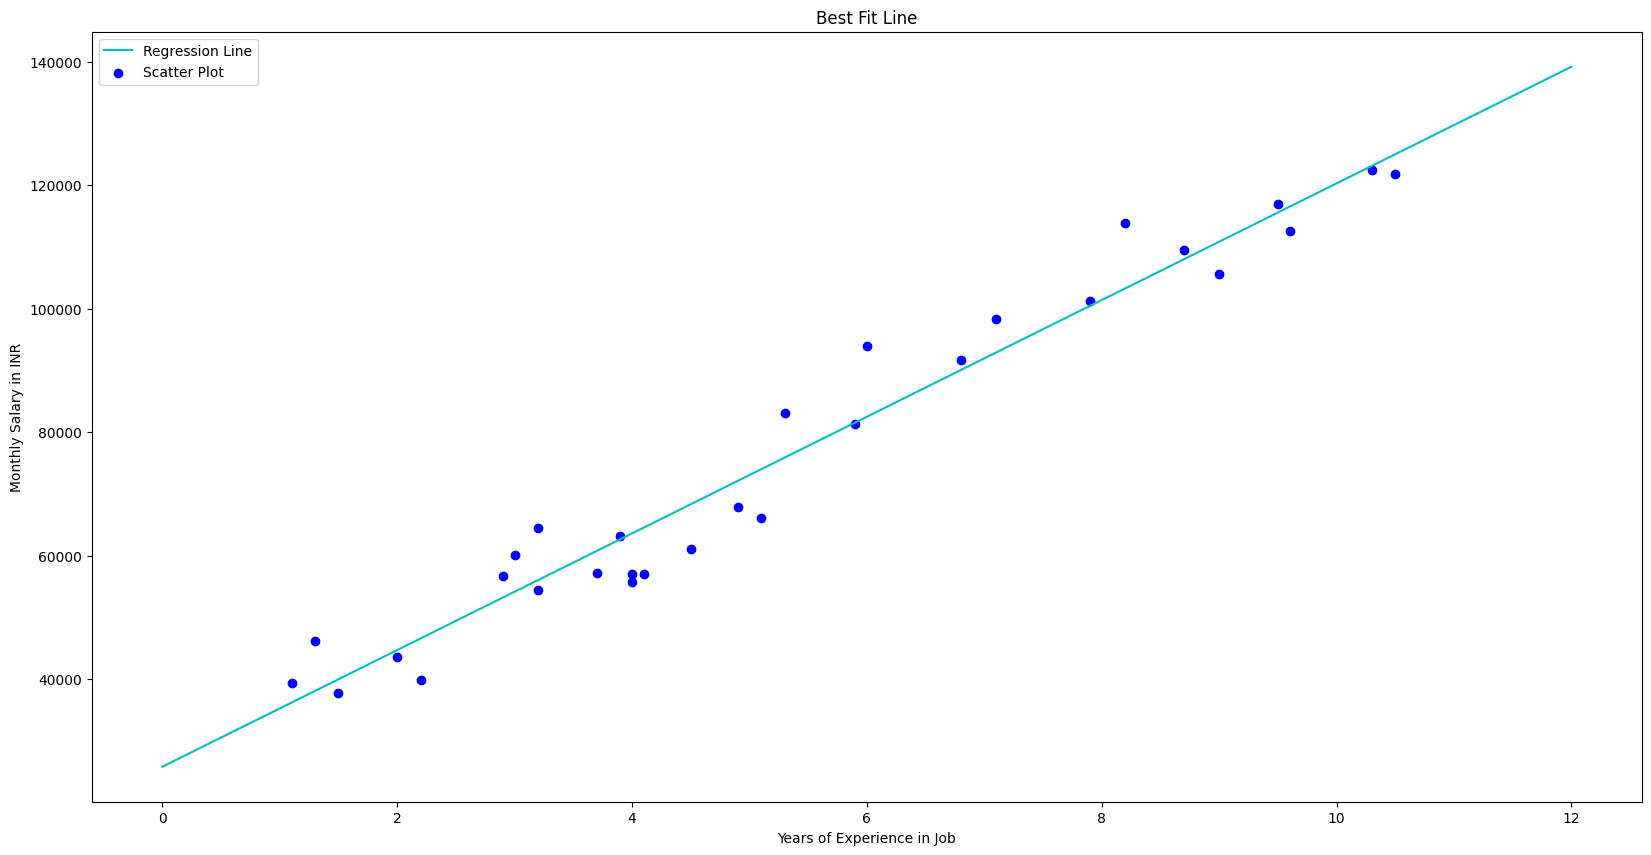

In [147]:
# To plot our linear regression line
max_X = np.max(X) + 1.5
min_X = np.min(X) - 1.1
x = np.linspace(min_X, max_X, 100)
y = intercept + slope*x
plt.plot(x, y, c= 'c', label = 'Regression Line')
plt.scatter(data["YearsExperience"], data["Salary"], c = 'b', label = 'Scatter Plot')
plt.title('Best Fit Line')
plt.xlabel('Years of Experience in Job')
plt.ylabel('Monthly Salary in INR')
plt.legend()
plt.show()

In [148]:
# Calculating the R^2 metric
ss_t = 0
ss_r = 0
for i in range(len(X)):
    y_pred = intercept + slope*X[i]
    ss_t+= (Y[i]-mean_Y)**2
    ss_r+= (Y[i]-y_pred)**2
r2 = 1 - (ss_r/ss_t)
print(r2)

0.9569566641435086


Using Scikit Learn for Linear Regression Model and Calculating other metrics

In [150]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
X=X.reshape((-1,1)) # Cannot use rank 1 matrix in scikit learn model

In [151]:
# Creating the model
reg = LinearRegression()
reg = reg.fit(X,Y)
Y_pred = reg.predict(X)
mse = mean_squared_error(Y,Y_pred)
rmse = np.sqrt(mse)
r2_score = reg.score(X,Y)
print("Mean Squared Error: "+str(mse))
print("Root Mean Squared Error: "+str(rmse))
print("R^2 value of model: "+str(r2_score))

Mean Squared Error: 31270951.722280968
Root Mean Squared Error: 5592.043608760662
R^2 value of model: 0.9569566641435086
